In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

sns.set_style('whitegrid')

In [4]:
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values
#replace missing value with U0
train_data['Cabin'] = train_data.Cabin.fillna('U0') 

In [5]:
from sklearn.ensemble import RandomForestRegressor

#choose training data to predict age
age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['Age'].isnull(), ['Age']]= predictAges

In [8]:
print(train_data.groupby(['Sex','Survived'])['Survived'].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


In [9]:
print(train_data.groupby(['Pclass','Survived'])['Pclass'].count())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64


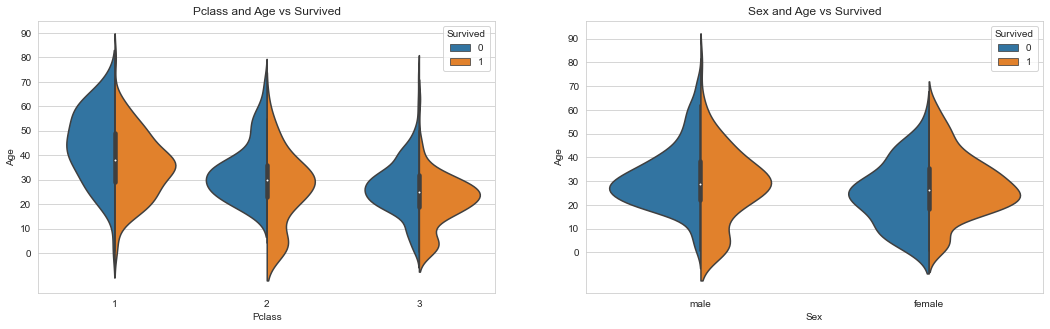

In [10]:
fig,ax = plt.subplots(1,2, figsize = (18,5))
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Pclass","Age",hue="Survived",data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived') 

ax[1].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
 
plt.show()

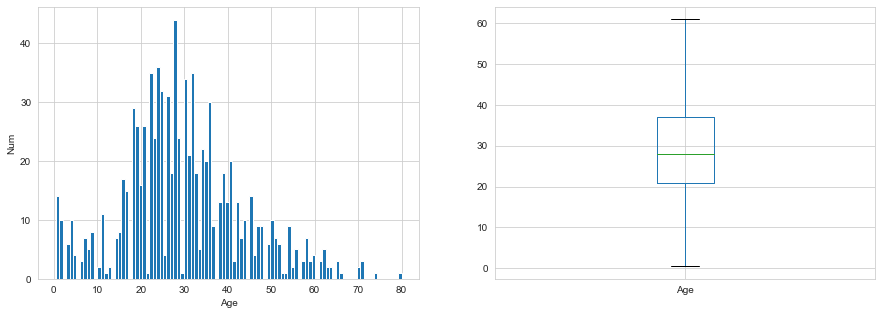

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(121)
train_data['Age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Num')
 
plt.subplot(122)
train_data.boxplot(column='Age',showfliers=False)
plt.show()

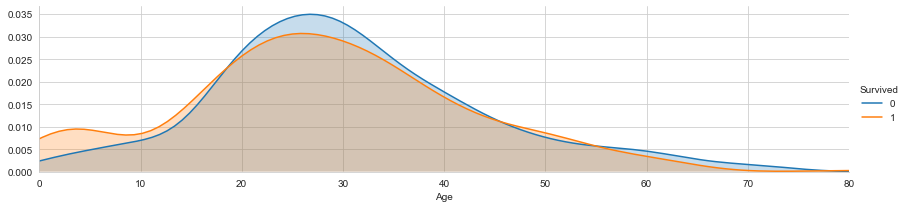

In [12]:
facet = sns.FacetGrid(train_data,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()

<AxesSubplot:xlabel='Age_int', ylabel='Survived'>

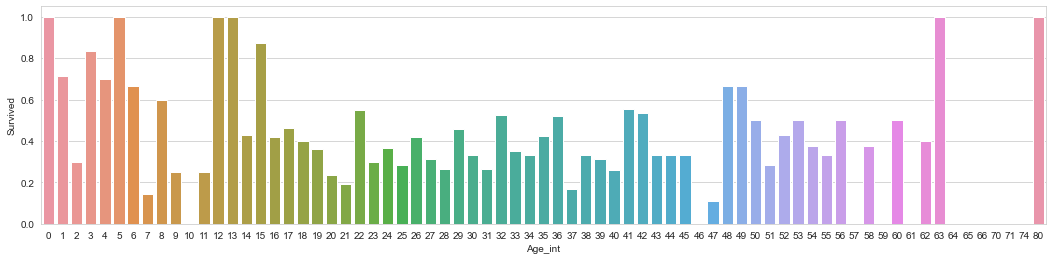

In [13]:
# average survived passengers by age
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Age_int'] = train_data['Age'].astype(int)
average_age = train_data[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int',y='Survived',data=average_age)

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,35


In [15]:
train_data['Age'].describe()

count    891.000000
mean      29.661205
std       13.733720
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'],bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
print(by_age)

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64


In [18]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,Age_group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,22,"(18, 65]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,"(18, 65]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,26,"(18, 65]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,"(18, 65]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,35,"(18, 65]",Mr


<AxesSubplot:xlabel='Name_length', ylabel='Survived'>

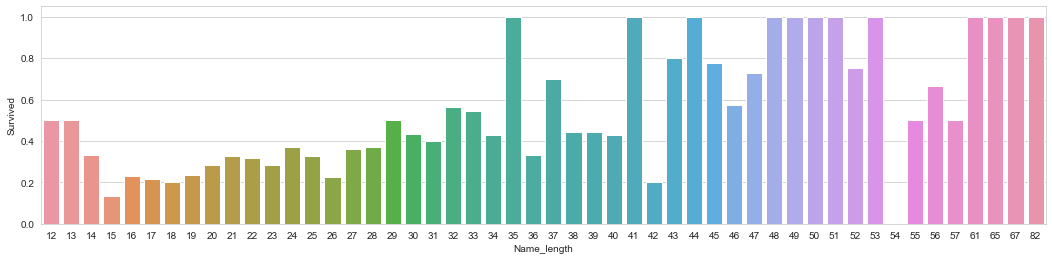

In [20]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'], as_index=False).mean()
sns.barplot(x='Name_length', y='Survived',data=name_length)

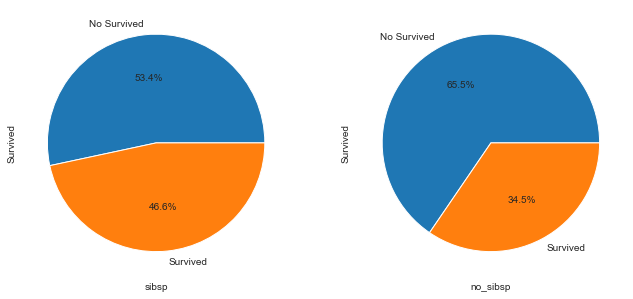

In [21]:
#将数据分为有兄弟姐妹和没有兄弟姐妹的两组：
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

plt.figure(figsize=(11,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%')
plt.xlabel('sibsp')
 
plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%')
plt.xlabel('no_sibsp')
 
plt.show()

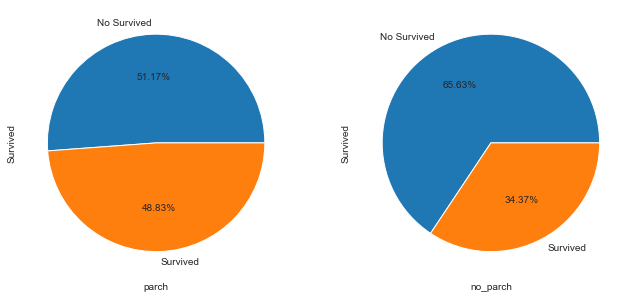

In [22]:
parch_df = train_data[train_data['Parch'] != 0]  
no_parch_df = train_data[train_data['Parch'] == 0]  
 
plt.figure(figsize=(11,5))  
plt.subplot(121)  
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct= '%1.2f%%')  
plt.xlabel('parch')  
 
plt.subplot(122)  
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.2f%%')  
plt.xlabel('no_parch') 
 
plt.show()  

Text(0.5, 1.0, 'SibSp and Survived')

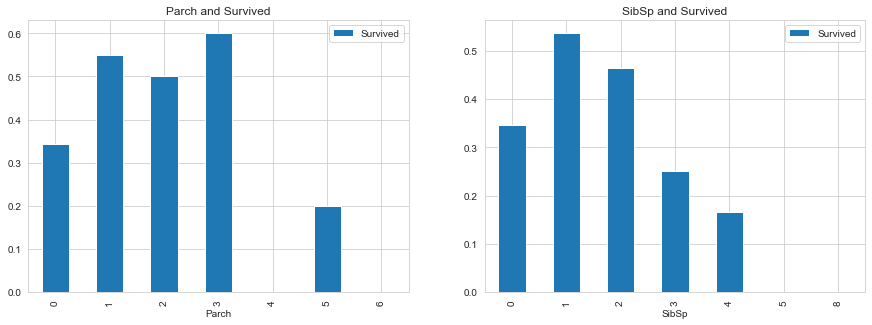

In [23]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')

<AxesSubplot:xlabel='Family_Size'>

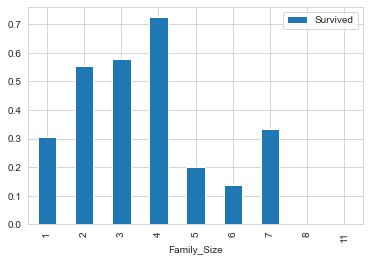

In [24]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp']+1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

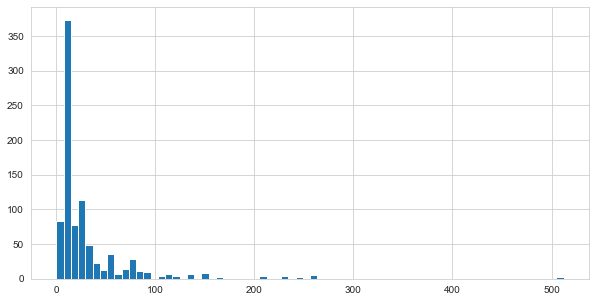

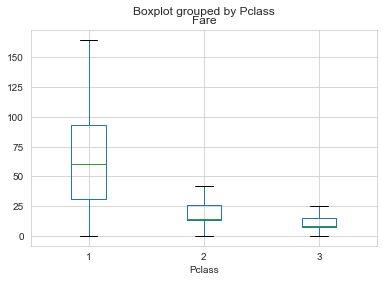

In [25]:
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins=70)
 
train_data.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

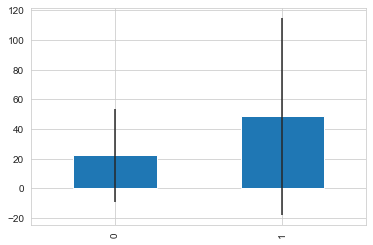

In [26]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]
 
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_fare.plot(yerr=std_fare,kind='bar',legend=False)
 
plt.show()

<AxesSubplot:xlabel='Has_Cabin'>

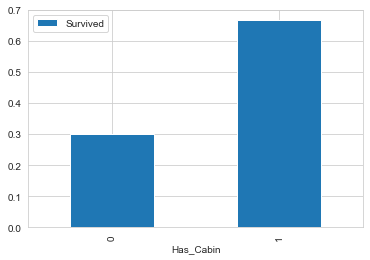

In [27]:
# Replace missing values with "U0"
train_data.loc[train_data.Cabin.isnull(),'Cabin'] = 'U0'
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

<AxesSubplot:xlabel='CabinLetter'>

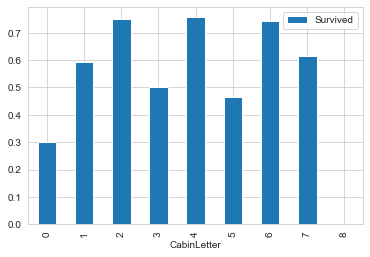

In [28]:
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,Age_group,Title,Name_length,Family_Size,Has_Cabin,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,22,"(18, 65]",Mr,23,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,"(18, 65]",Mrs,51,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,26,"(18, 65]",Miss,22,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,"(18, 65]",Mrs,44,2,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,35,"(18, 65]",Mr,24,1,0,0


Text(0.5, 1.0, 'Embarked and Survived')

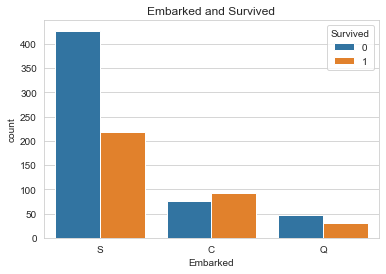

In [31]:
sns.countplot('Embarked',hue='Survived',data=train_data)
plt.title('Embarked and Survived')

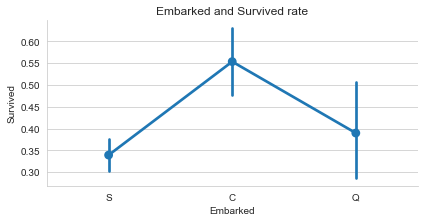

In [32]:
sns.factorplot('Embarked','Survived',data = train_data, size=3, aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

In [33]:
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'], axis=1, inplace=True)

embark_dummies = train_data[['S','C','Q']]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [34]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_int,Age_group,Title,Name_length,Family_Size,Has_Cabin,CabinLetter,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22,"(18, 65]",Mr,23,2,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38,"(18, 65]",Mrs,51,2,1,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26,"(18, 65]",Miss,22,1,0,0,0,0,1


In [35]:
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

train_data[['Cabin','CabinLetter']].head()

,Cabin,CabinLetter
0,U0,0
1,C85,1
2,U0,0
3,C123,1
4,U0,0


In [36]:
from sklearn import preprocessing
 
assert np.size(train_data['Age']) == 891
# StandardScaler will subtract the mean from each value then scale to the unit varience
scaler = preprocessing.StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape(-1,1))

In [37]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_group,Title,Name_length,Family_Size,Has_Cabin,CabinLetter,C,Q,S,Age_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(18, 65]",Mr,23,2,0,0,0,0,1,-0.558152
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(18, 65]",Mrs,51,2,1,1,1,0,0,0.607518
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(18, 65]",Miss,22,1,0,0,0,0,1,-0.266735


In [38]:
# Divide all fares into quartiles
train_data['Fare_bin'] = pd.qcut(train_data['Fare'],5)
print(train_data['Fare_bin'].head())

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]


In [39]:
# qcut() create a new variable that idetifies the quartile range, but we can't use the string
# so either factorize or create dummies from the result
 
# factorize
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]
 
# dummies
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

In [40]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,Age_scaled,Fare_bin,Fare_bin_id,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,-0.558152,"(-0.001, 7.854]",0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0.607518,"(39.688, 512.329]",1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,-0.266735,"(7.854, 10.5]",2,0,1,0,0,0


In [46]:
train_df_org = pd.read_csv('train.csv')
test_df_org = pd.read_csv('test.csv')
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)   #891+418=1309rows, 12columns
PassengerId = test_df_org['PassengerId']

In [42]:
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True)

In [49]:
#为了后面的特征分析，这里我们将Embarked特征进行factorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]
 
#使用pd.get_dummies获取one-hot编码
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

In [50]:
# 为了后面的特征分析，这里我们也将Sex特征进行factorizing
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]
 
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'],prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test,sex_dummies_df],axis=1)

In [51]:
# what is each person's title?
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
combined_train_test['Title'] = combined_train_test['Title'].apply(lambda x:x.strip())

In [52]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
title_Dict.update(dict.fromkeys(['Male','Miss'],'Miss'))
title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))
 
combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

In [55]:
#为了后面的特征分析，这里我们也将Title特征进行factorizing
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]
title_dummies_df = pd.get_dummies(combined_train_test['Title'],prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test,title_dummies_df],axis=1)

In [56]:
combined_train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_0,Sex_1,Title,Title_-1,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,1,1,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,2,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,1,1,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,0,0,0,1,0,0,0,0,0


In [57]:
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

In [58]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

In [59]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare']/combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'],axis=1,inplace=True)

In [60]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)

In [61]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)
 
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]
 
fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test,fare_bin_dummies_df],axis=1)
combined_train_test.drop(['Fare_bin'],axis=1, inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder
 
#建立Pclass Fare Category
def pclass_fare_category(df,pclass1_mean_fare,pclass2_mean_fare,pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'
 
Pclass1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(1)
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(2)
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(3)
 
#建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category,args=(
        Pclass1_mean_fare,Pclass2_mean_fare,Pclass3_mean_fare),axis=1)
pclass_level = LabelEncoder()
 
#给每一项添加标签
pclass_level.fit(np.array(['Pclass1_Low','Pclass1_High','Pclass2_Low','Pclass2_High','Pclass3_Low','Pclass3_High']))
 
#转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])
 
# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test,pclass_dummies_df],axis=1)


In [63]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

In [64]:
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                        prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

In [65]:
missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,NaN,2,0,0,16,1,1,8.4583,2,0
17,NaN,0,0,0,28,1,1,13.0000,3,2
19,NaN,1,1,1,23,1,1,7.2250,4,0
26,NaN,1,0,0,23,1,1,7.2250,4,0
28,NaN,2,1,2,29,1,1,7.8792,0,0


In [66]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

    # model 1  gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])

    # model 2 rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    # two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

In [67]:
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   10.6s remaining:   10.6s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   12.1s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-128.5339274299347
GB Train Error for "Age" Feature Regressor:-66.46420604404157
5     35.957482
17    31.469899
19    33.210927
26    28.501164
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    3.9s finished


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-119.63830609656036
RF Train Error for "Age" Feature Regressor-96.86323407168965
5     33.513123
17    33.098071
19    34.853983
26    28.148613
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     29.96755
17    29.96755
19    29.96755
26    29.96755
Name: Age, dtype: float64


In [68]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)

# 如果要提取数字信息，则也可以这样做，现在我们对数字票单纯地分为一类。
# combined_train_test['Ticket_Number'] = combined_train_test['Ticket'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# combined_train_test['Ticket_Number'].fillna(0, inplace=True)

# 将 Ticket_Letter factorize
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

In [69]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

In [70]:
from sklearn import preprocessing
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare','Name_length']])
combined_train_test[['Age','Fare','Name_length']] = scale_age_fare.transform(combined_train_test[['Age','Fare','Name_length']])

In [72]:
combined_data_backup = combined_train_test

combined_train_test.drop(['PassengerId','Embarked','Sex','Name','Fare_bin_id','Pclass_Fare_Category',                          'Parch','SibSp','Family_Size_Category','Ticket'],axis=1,inplace=True)

In [73]:
combined_train_test.

,Survived,Pclass,Age,Fare,Cabin,Embarked_-1,Embarked_0,Embarked_1,Embarked_2,Sex_0,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,0,0,-0.613318,-0.554177,0,0,1,0,0,1,...,0,0,0,0,1,2,0,0,1,0
1,1,1,0.629081,1.541869,1,0,0,1,0,0,...,0,0,0,0,0,2,0,0,1,1
2,1,0,-0.302718,-0.504344,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,2
3,1,1,0.396131,0.870667,1,0,1,0,0,0,...,1,0,0,0,0,2,0,0,1,3
4,0,0,0.396131,-0.495116,0,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,3


## 这里开始是数据的训练和测试

In [89]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]
 
titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [90]:
titanic_train_data_X

,Pclass,Age,Fare,Cabin,Embarked_-1,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,0,-0.613318,-0.554177,0,0,1,0,0,1,0,...,0,0,0,0,1,2,0,0,1,0
1,1,0.629081,1.541869,1,0,0,1,0,0,1,...,0,0,0,0,0,2,0,0,1,1
2,0,-0.302718,-0.504344,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,2
3,1,0.396131,0.870667,1,0,1,0,0,0,1,...,1,0,0,0,0,2,0,0,1,3
4,0,0.396131,-0.495116,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,-0.225068,-0.129677,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,3
887,1,-0.846267,1.125368,1,0,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,3
888,0,0.005362,-0.656611,0,0,1,0,0,0,1,...,0,0,0,0,1,4,0,0,1,15
889,1,-0.302718,1.125368,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,3


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
def get_top_n_features(titanic_train_data_X,titanic_train_data_Y,top_n_features):
    
    #randomforest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators':[500],'min_samples_split':[2,3],'max_depth':[20]}
    rf_grid = model_selection.GridSearchCV(rf_est,rf_param_grid,n_jobs=25,cv=10,verbose=1)
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Feeatures from RF Classifier')
    print(str(features_top_n_rf[:10]))
    
    #AdaBoost
    ada_est = AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est,ada_param_grid,n_jobs=25,cv=10,verbose=1)
    ada_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(titanic_train_data_X),
                                           'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Features from Ada Classifier:')
    print(str(features_top_n_ada[:10]))
    
    #ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators':[500],'min_samples_split':[3,4],'max_depth':[20]}
    et_grid = model_selection.GridSearchCV(et_est,et_param_grid,n_jobs=25,cv=10,verbose=1)
    et_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best DT Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':et_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est = GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1],'max_depth':[20]}
    gb_grid = model_selection.GridSearchCV(gb_est,gb_param_grid,n_jobs=25,cv=10,verbose=1)
    gb_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':gb_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split':[2,4],'max_depth':[20]}
    dt_grid = model_selection.GridSearchCV(dt_est,dt_param_grid,n_jobs=25,cv=10,verbose=1)
    dt_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Bset DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':dt_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf,features_top_n_ada,features_top_n_et,features_top_n_gb,features_top_n_dt],
                              ignore_index=True).drop_duplicates()
    features_importance = pd.concat([feature_imp_sorted_rf,feature_imp_sorted_ada,feature_imp_sorted_et,
                                     feature_imp_sorted_gb,feature_imp_sorted_dt],ignore_index=True)
    
    return features_top_n,features_importance


In [77]:
feature_to_pick = 30
feature_top_n,feature_importance = get_top_n_features(titanic_train_data_X,titanic_train_data_Y,feature_to_pick)
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    6.9s remaining:    3.7s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    7.0s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.8249438202247191
Top N Features RF Train Score:0.9820426487093153
Sample 10 Feeatures from RF Classifier
18      Name_length
1               Age
2              Fare
10            Title
12          Title_0
8             Sex_0
9             Sex_1
30      Family_Size
0            Pclass
34    Ticket_Letter
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    6.7s remaining:    3.5s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    6.8s finished


Top N Features Best Ada Params:{'learning_rate': 0.01, 'n_estimators': 500}
Top N Features Best Ada Score:0.8181897627965042
Top N Features Ada Train Score:0.8204264870931538
Sample 10 Features from Ada Classifier:
12                   Title_0
2                       Fare
31    Family_Size_Category_0
30               Family_Size
8                      Sex_0
0                     Pclass
3                      Cabin
9                      Sex_1
18               Name_length
1                        Age
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    4.6s remaining:    2.4s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    4.7s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best DT Score:0.8260299625468164
Top N Features ET Train Score:0.9719416386083053
Sample 10 Features from ET Classifier:
12          Title_0
9             Sex_1
8             Sex_0
18      Name_length
1               Age
2              Fare
3             Cabin
10            Title
34    Ticket_Letter
13          Title_1
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   23.9s remaining:   12.8s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   25.1s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.7801498127340823
Top N Features GB Train Score:0.9966329966329966
Sample 10 Feature from GB Classifier:
12                   Title_0
1                        Age
2                       Fare
18               Name_length
30               Family_Size
29                  Pclass_5
0                     Pclass
31    Family_Size_Category_0
17                   Title_5
34             Ticket_Letter
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Top N Features Bset DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.7789887640449438
Top N Features DT Train Score:0.9629629629629629
Sample 10 Features from DT Classifier:
12                   Title_0
1                        Age
2                       Fare
18               Name_length
31    Family_Size_Category_0
10                     Title
0           

[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.0s finished


In [78]:
from sklearn.model_selection import KFold
 
# Some useful parameters which will come in handy later on
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
SEED = 0 #for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS,random_state=SEED,shuffle=False)
 
def get_out_fold(clf,x_train,y_train,x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    
    for i, (train_index,test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr,y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

In [93]:
ntrain

891

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
rf = RandomForestClassifier(n_estimators=500,warm_start=True,max_features='sqrt',max_depth=6,min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
 
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
 
et = ExtraTreesClassifier(n_estimators=500,n_jobs=-1,max_depth=8,min_samples_leaf=2,verbose=0)
 
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.008,min_samples_split=3,min_samples_leaf=2,max_depth=5,verbose=0)
 
dt = DecisionTreeClassifier(max_depth=8)
 
knn = KNeighborsClassifier(n_neighbors=2)
 
svm = SVC(kernel='linear',C=0.025)


In [80]:
# Create Numpy arrays of train,test and target(Survived) dataframes to feed into our models
x_train = titanic_train_data_X.values   #Creates an array of the train data
x_test = titanic_test_data_X.values   #Creates an array of the test data
y_train = titanic_train_data_Y.values

In [92]:
titanic_train_data_X

,Pclass,Age,Fare,Cabin,Embarked_-1,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,0,-0.613318,-0.554177,0,0,1,0,0,1,0,...,0,0,0,0,1,2,0,0,1,0
1,1,0.629081,1.541869,1,0,0,1,0,0,1,...,0,0,0,0,0,2,0,0,1,1
2,0,-0.302718,-0.504344,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,2
3,1,0.396131,0.870667,1,0,1,0,0,0,1,...,1,0,0,0,0,2,0,0,1,3
4,0,0.396131,-0.495116,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,-0.225068,-0.129677,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,3
887,1,-0.846267,1.125368,1,0,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,3
888,0,0.005362,-0.656611,0,0,1,0,0,0,1,...,0,0,0,0,1,4,0,0,1,15
889,1,-0.302718,1.125368,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,3


In [81]:
# Create our OOF train and test predictions.These base result will be used as new featurs
rf_oof_train,rf_oof_test = get_out_fold(rf,x_train,y_train,x_test)  # Random Forest
ada_oof_train,ada_oof_test = get_out_fold(ada,x_train,y_train,x_test)  # AdaBoost
et_oof_train,et_oof_test = get_out_fold(et,x_train,y_train,x_test)  # Extra Trees
gb_oof_train,gb_oof_test = get_out_fold(gb,x_train,y_train,x_test)  # Gradient Boost
dt_oof_train,dt_oof_test = get_out_fold(dt,x_train,y_train,x_test)  #Decision Tree
knn_oof_train,knn_oof_test = get_out_fold(knn,x_train,y_train,x_test)  # KNeighbors
svm_oof_train,svm_oof_test = get_out_fold(svm,x_train,y_train,x_test)  # Support Vector
 
print("Training is complete")


Training is complete


In [83]:
x_train = np.concatenate((rf_oof_train,ada_oof_train,et_oof_train,gb_oof_train,dt_oof_train,knn_oof_train,svm_oof_train),axis=1)
x_test =np.concatenate((rf_oof_test,ada_oof_test,et_oof_test,gb_oof_test,dt_oof_test,knn_oof_test,svm_oof_test),axis=1)


In [84]:
from xgboost import XGBClassifier
 
gbm = XGBClassifier(n_estimators=200,max_depth=4,min_child_weight=2,gamma=0.9,subsample=0.8,
                    colsample_bytree=0.8,objective='binary:logistic',nthread=-1,scale_pos_weight=1).fit(x_train,y_train)
predictions = gbm.predict(x_test)

In [85]:
StackingSubmission = pd.DataFrame({'PassengerId':PassengerId,'Survived':predictions})
StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')

In [95]:
PassengerId.shape

(418,)